# Entorno macroeconómico
$$x^2 - 3$$

In [1]:
# Importar paquetes requeridos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.close('all')

El primer análisis es el del producto interno bruto. Para ello empleamos la serie `pib_trimestral`:

In [2]:
# Cargar base de datos del PIB
pib_trimestral = pd.read_excel('pib.xlsx', engine = 'openpyxl')
pib_trimestral = pib_trimestral.set_index('periodo')
pib_trimestral.head()

,trimestre,pib,importaciones,consumo,gasto,inversion,exportaciones,discrepancia
periodo,,,,,,,,
1993,1,1.000889e+07,1458413.400,6094259.456,1410454.426,2311587.205,1421049.137,229957.838
1993,2,1.017104e+07,1574506.158,6304689.609,1428916.551,2199172.511,1477720.814,335042.080
1993,3,1.006626e+07,1558216.038,6243681.365,1376521.052,2214659.705,1465345.740,324266.582
1993,4,1.041610e+07,1717843.240,6598264.978,1423995.127,2355827.803,1588555.613,167295.950
1994,1,1.034339e+07,1729058.259,6258192.612,1453656.689,2665717.344,1576502.879,118377.226


La serie `pib_trimestral` contiene observaciones del PIB trimestral *anualizado* de México. Esto quiere decir que cada observación se debe dividir por 4 para obtener el PIB del trimestre. Por tanto, para obtener el PIB anual se debe calcular el promedio de los correspondientes valores trimestrales. Esta nueva serie se llama `pib_anual`:

In [3]:
# Agrupar por periodo y calcular la media:
pib_anual = pib_trimestral
pib_anual = pib_anual.groupby('periodo')
pib_anual = pib_anual.aggregate(np.mean)

# Eliminar la columna 'trimestre' que ya no es necesaria:
pib_anual.pop('trimestre')

pib_anual.head()

,pib,importaciones,consumo,gasto,inversion,exportaciones,discrepancia
periodo,,,,,,,
1993,1.016557e+07,1.577245e+06,6.310224e+06,1.409972e+06,2.270312e+06,1.488168e+06,264140.61250
1994,1.066786e+07,1.857120e+06,6.644794e+06,1.452318e+06,2.598265e+06,1.619055e+06,210548.39250
1995,9.996721e+06,1.561054e+06,6.254226e+06,1.436595e+06,1.785976e+06,1.946071e+06,134905.26825
1996,1.067382e+07,1.833894e+06,6.537721e+06,1.436303e+06,2.067390e+06,2.246699e+06,219606.00675
1997,1.140465e+07,2.257764e+06,7.026836e+06,1.505833e+06,2.358747e+06,2.457556e+06,313437.85300


Si el cálculo es correcto esperamos que se cumpla la identidad contable:
$$ Y = C + I + G + EX - IM + \epsilon$$
donde $Y$ es el PIB (del lado de la oferta), mientras que el lado de la demanda es la suma del consumo ($C$), la inversión ($I$), el gasto público ($G$), las exportaciones ($EX$), las importaciones ($IM$) y la llamada "discrepancia estadística" $\epsilon$.

In [4]:
pib_anual_2 = pib_anual

# Obtener la suma de los componentes del lado de la demanda:
pib_anual_2['suma'] = pib_anual_2['consumo'] + pib_anual_2['inversion'] + pib_anual_2['gasto'] + pib_anual_2['exportaciones'] - pib_anual_2['importaciones'] + pib_anual_2['discrepancia']

# Obtener la diferencia entre el PIB (oferta) y la demanda, que debe ser cero:
pib_anual_2['diferencia'] = round(pib_anual_2['pib'] - pib_anual_2['suma'])
pib_anual_2.loc[:, ['pib', 'suma', 'diferencia']]

# Diferencia máxima y mínima:
(max(pib_anual_2['diferencia']), min(pib_anual_2['diferencia']))

(0.0, 0.0)

Text(0, 0.5, 'Producto interno bruto anual')

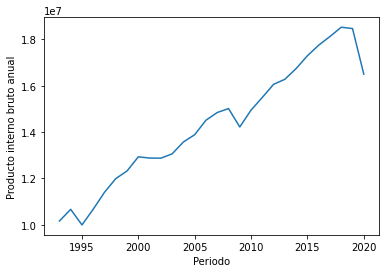

In [5]:
pib_anual['pib'].plot()
plt.xlabel('Periodo')
plt.ylabel('Producto interno bruto anual')

En general, pensamos que el PIB depende en cierta medida del crecimiento de la población, por lo que es útil eliminar este efecto calculando el PIB per cápita. Para ello usamos la serie `poblacion` que contiene información de la población de México registrada en los censos quinquenales:

Index(['1910 ', '1921 ', '1930 ', '1940 ', '1950 ', '1960 ', '1970 ', '1980 ',
       '1990 ', '1995 ', '2000 ', '2005 ', '2010 ', '2015 '],
      dtype='object', name='periodo')

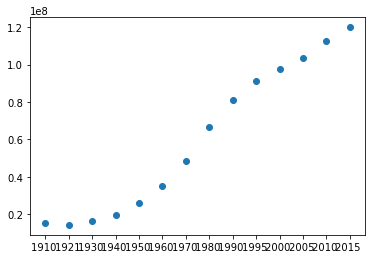

In [7]:
# Cargar base de datos del la población
poblacion = pd.read_excel('poblacion.xlsx', engine = 'openpyxl')
poblacion = poblacion.set_index('periodo')
plt.plot(poblacion['poblacion'], 'o')
poblacion.index

Debido a que la información no es anual, es necesario estimar la población en los periodos intercensales. La forma más sencilla de hacerlo es mediante una estimación (interpolación) lineal entre los periodos censales.